In [1]:
!pip install pandas numpy seaborn matplotlib scikit-learn xgboost

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train=pd.read_csv(r'C:\Users\keert\Downloads\FinalProject-BigMart\Data\Train.csv')
df_test=pd.read_csv(r'C:\Users\keert\Downloads\FinalProject-BigMart\Data\Test.csv')

In [4]:
df_train.shape

(8523, 12)

In [5]:
df_test.shape

(5681, 11)

In [6]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_train.isnull().sum()/df_train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


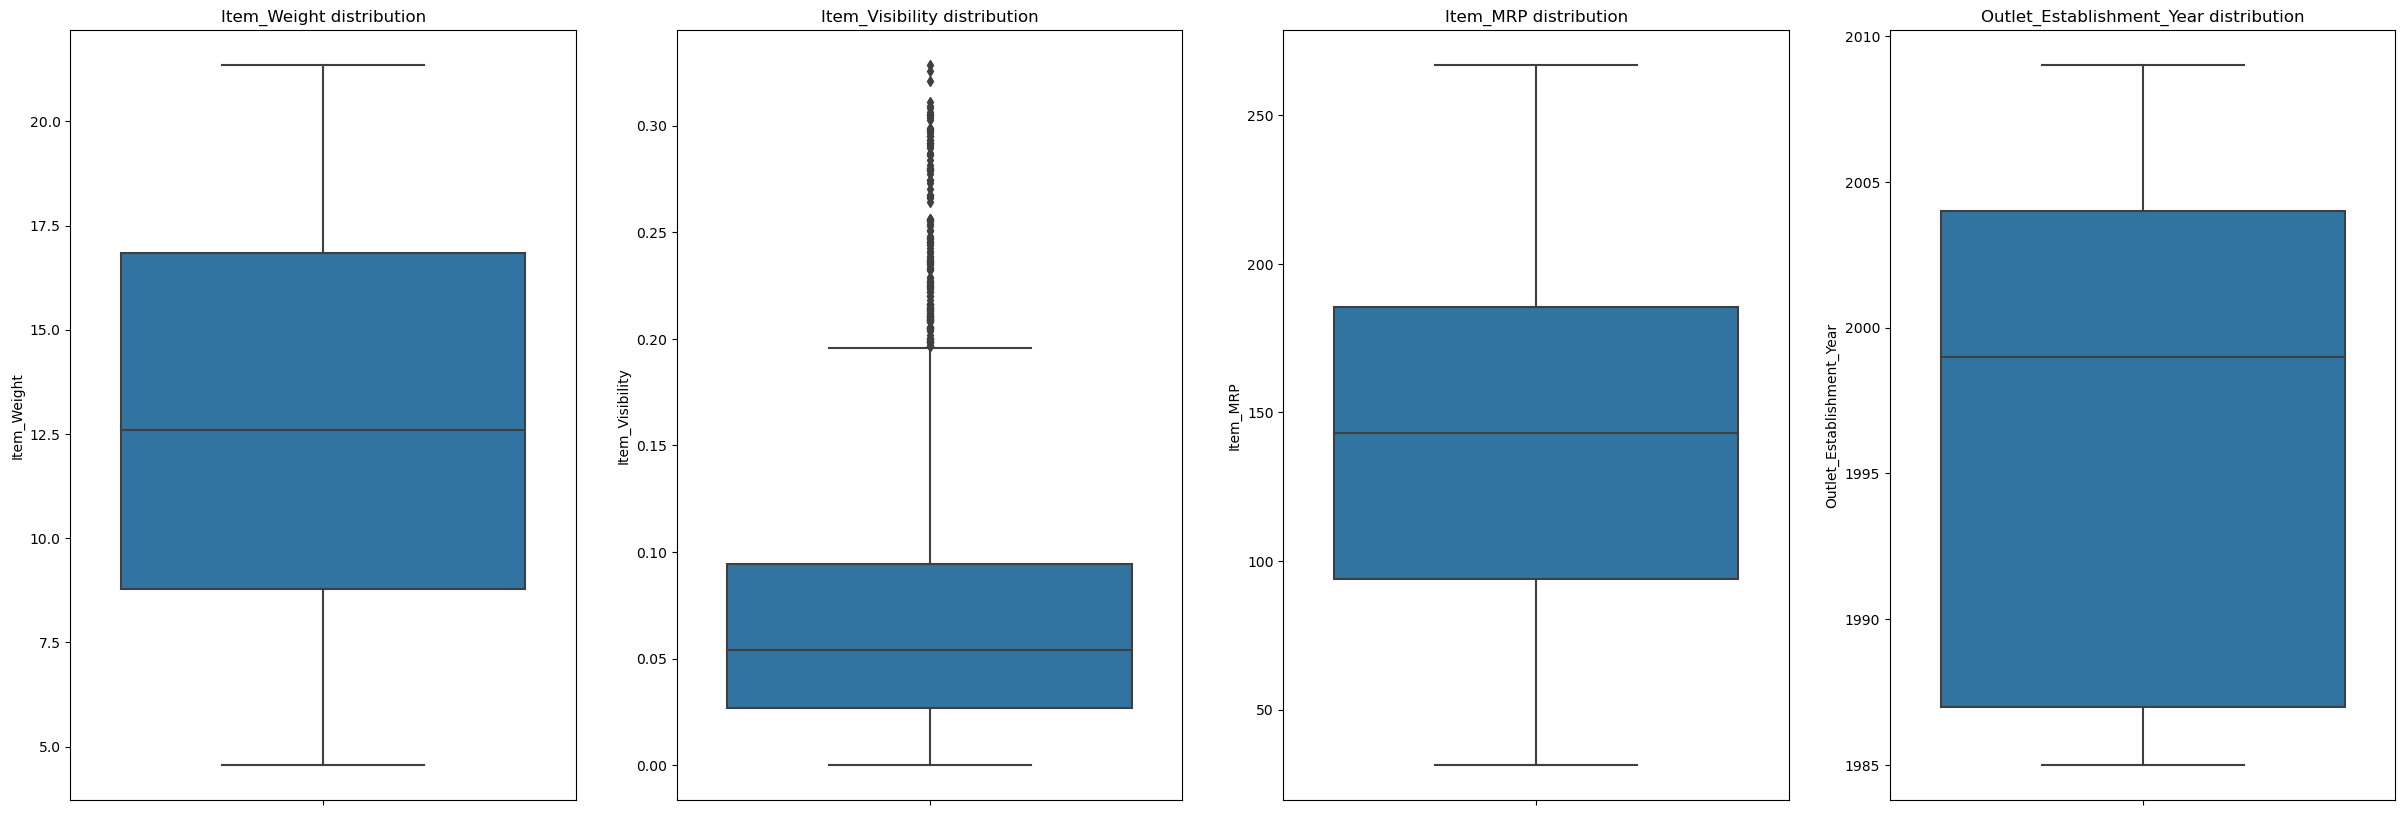

In [11]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,10))
for index, col in enumerate(['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']):
    sns.boxplot(data=df_train, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

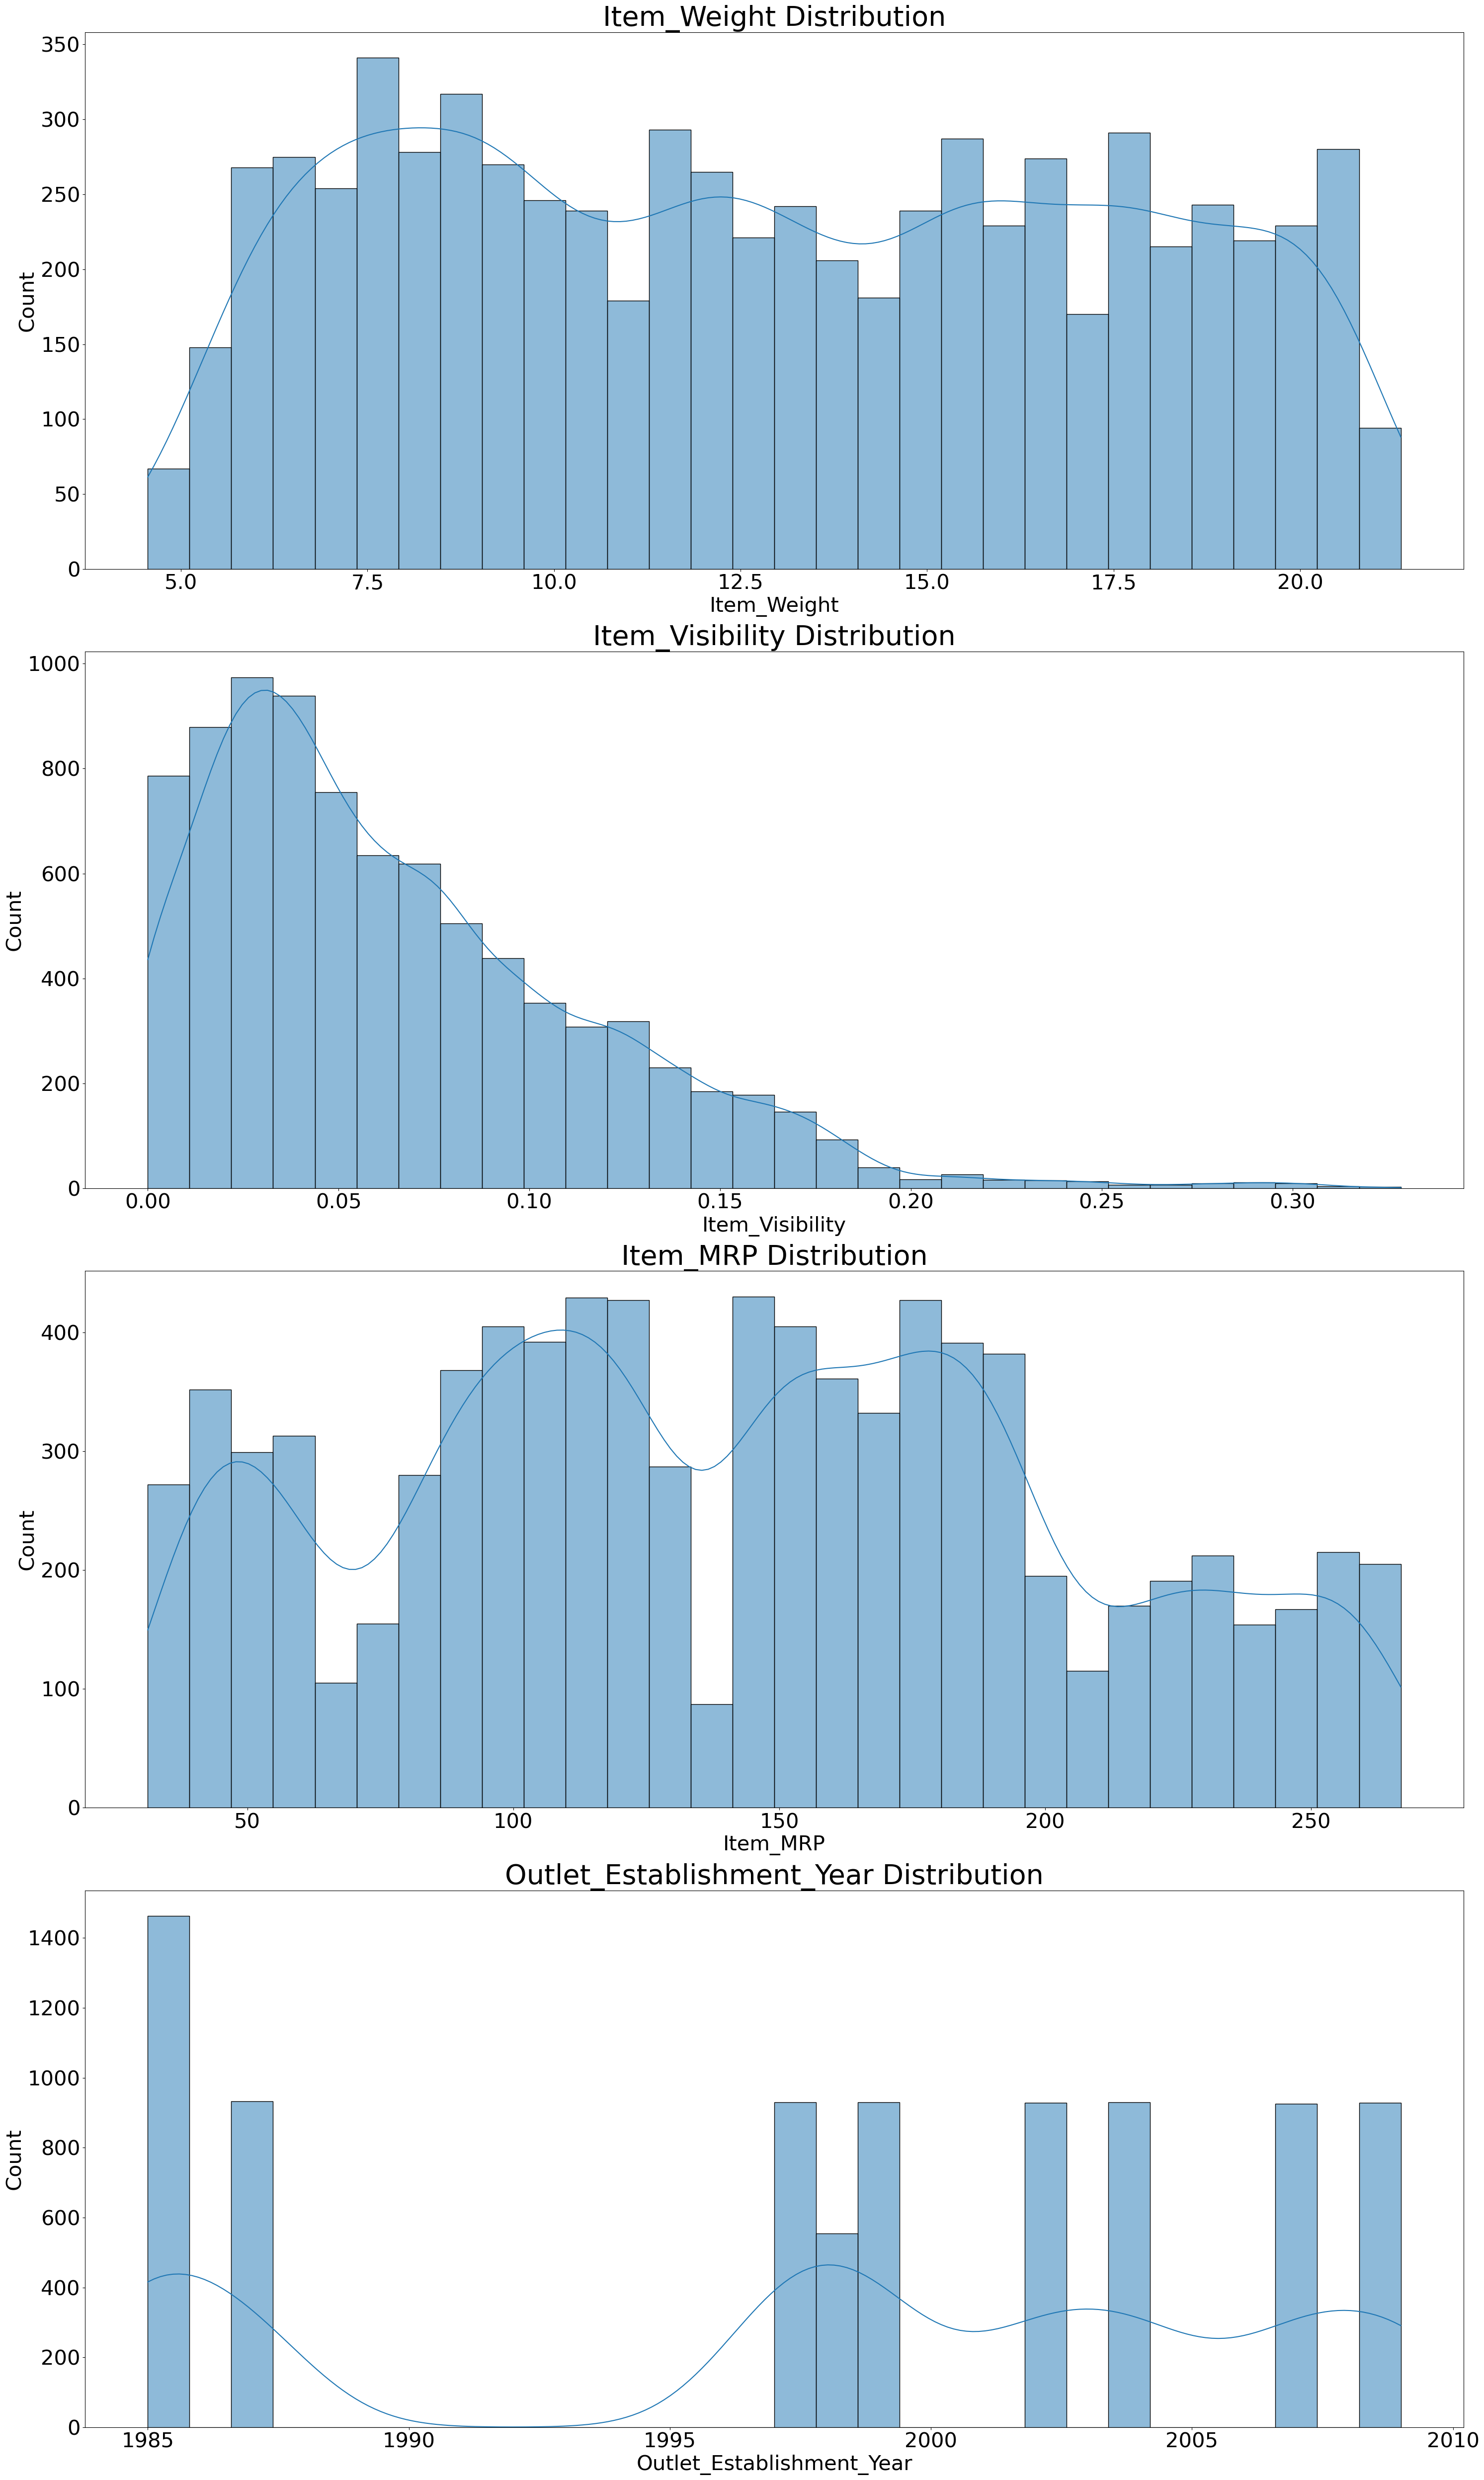

In [12]:
_, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 50))

# Flatten the 2x2 array of subplots for easier indexing
ax = ax.flatten()

# List of numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

for index, col in enumerate(numerical_columns):
    g = sns.histplot(data=df_train, x=col, kde=True, ax=ax[index],bins=30)
    ax[index].set_title(f'{col} Distribution', fontsize=40)  # Set title size

    # Increase font size of x-axis and y-axis tick labels
    g.tick_params(axis='x', labelsize=30)
    g.tick_params(axis='y', labelsize=30)

    # Increase font size of X-axis and Y-axis label
    g.set_xlabel(g.get_xlabel(), fontsize=30)
    g.set_ylabel(g.get_ylabel(), fontsize=30)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [6]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

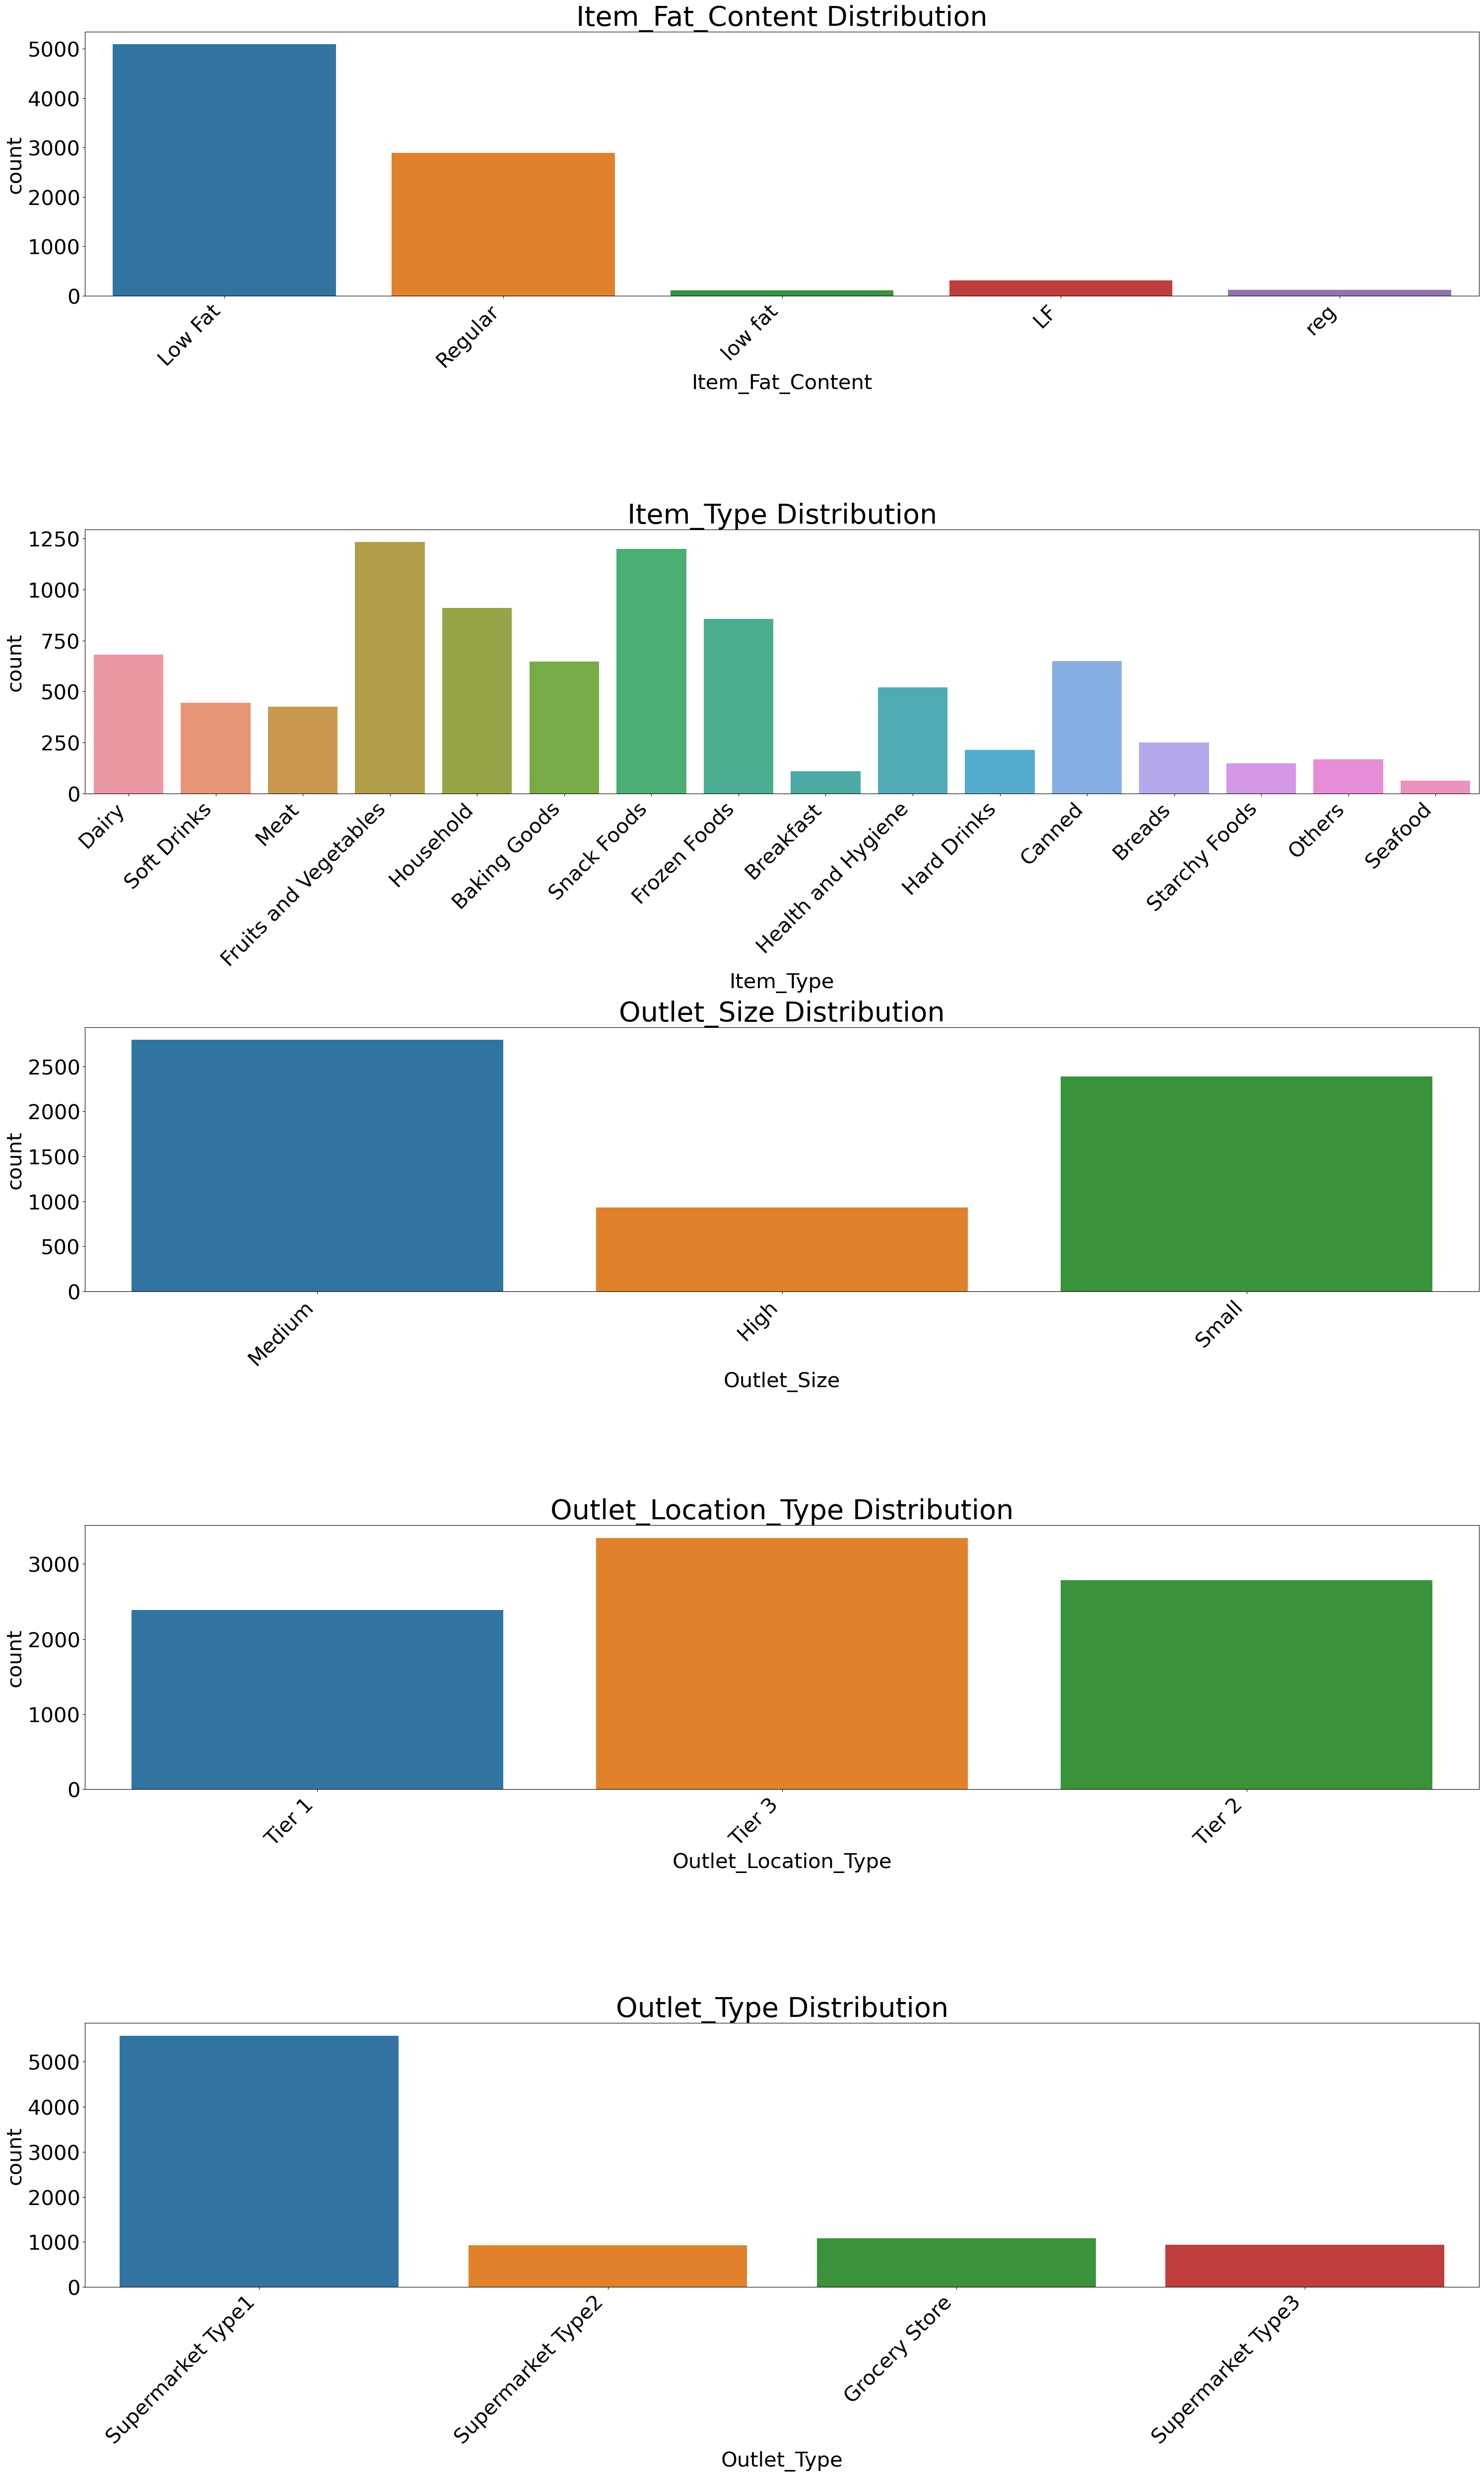

In [15]:
_, ax = plt.subplots(nrows=5, ncols=1, figsize=(30, 50))

for index, col in enumerate(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']):
    g = sns.countplot(data=df_train, x=col, ax=ax[index])
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=12)
    ax[index].set_title(f'{col} Distribution', fontsize=40)
    
    # Increase font size of x-axis and y-axis tick labels
    g.tick_params(axis='x', labelsize=30)
    g.tick_params(axis='y', labelsize=30)

    # Increase font size of X-axis and Y-axis label
    g.set_xlabel(g.get_xlabel(), fontsize=30)
    g.set_ylabel(g.get_ylabel(), fontsize=30)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [16]:
pd.crosstab(df_train['Outlet_Size'], df_train['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [7]:
df_train["Outlet_Size"].fillna(df_train.groupby("Outlet_Type")["Outlet_Size"].transform(lambda x:x.mode().iloc[0]), inplace=True)
df_test["Outlet_Size"].fillna(df_test.groupby("Outlet_Type")["Outlet_Size"].transform(lambda x:x.mode().iloc[0]), inplace=True)

In [18]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

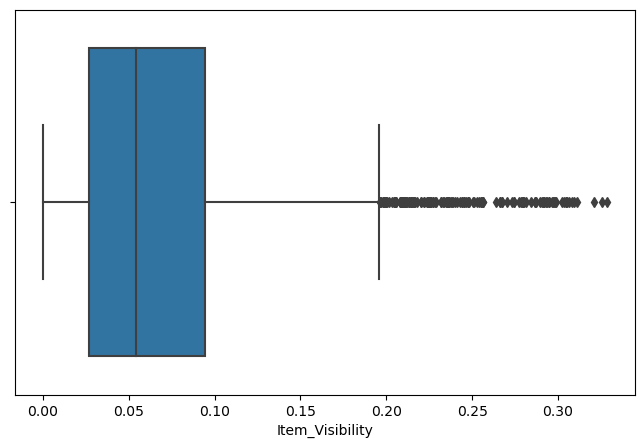

In [19]:
plt.figure(figsize = (8,5))
sns.boxplot( x = 'Item_Visibility', data = df_train);

In [8]:
Q1 = df_train['Item_Visibility'].quantile(0.25)
Q3 = df_train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5 * IQR
upper_limit=Q3 + 1.5 * IQR
df_train['Item_Visibility'] = df_train['Item_Visibility'].apply(lambda x: min(x,upper_limit))

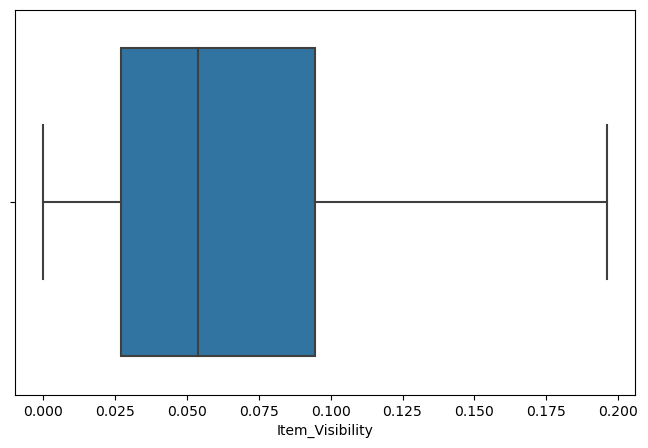

In [21]:
plt.figure(figsize = (8,5))
sns.boxplot( x = 'Item_Visibility', data = df_train);

In [22]:
df_train.shape

(8523, 12)

In [9]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [24]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [10]:
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [26]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [29]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [13]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
Y=df_train['Item_Outlet_Sales']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=99, test_size=0.2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


In [33]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [34]:
X_train_std= sc.fit_transform(X_train)

In [35]:
X_test_std= sc.transform(X_test)

In [36]:
X_train_std

array([[ 7.81461794e-01, -7.36805948e-01,  1.83847169e-03, ...,
        -6.79029083e-01, -1.36820824e+00, -2.45948691e-01],
       [ 1.59906865e-02, -7.36805948e-01, -3.13079095e-01, ...,
        -6.79029083e-01,  1.09539767e+00,  2.26999756e+00],
       [-1.46370588e+00, -7.36805948e-01, -7.99246279e-01, ...,
         7.92560328e-01, -1.36405285e-01, -2.45948691e-01],
       ...,
       [ 8.05070287e-01, -7.36805948e-01, -1.33755165e+00, ...,
        -2.15061849e+00,  1.09539767e+00, -2.45948691e-01],
       [ 1.23002316e+00, -7.36805948e-01, -1.16205413e+00, ...,
        -6.79029083e-01, -1.36820824e+00, -2.45948691e-01],
       [ 1.11198070e+00, -7.36805948e-01, -1.05663181e+00, ...,
        -6.79029083e-01,  1.09539767e+00,  1.01202444e+00]])

In [37]:
import joblib
joblib.dump(sc,r'C:\Users\keert\Downloads\FinalProject-BigMart\Models\standardscaler.sav')

['C:\\Users\\keert\\Downloads\\FinalProject-BigMart\\Models\\standardscaler.sav']

In [38]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr= LinearRegression()
lr.fit(X_train_std,Y_train)
Y_pred_lr=lr.predict(X_test_std)

print(f"R^2 Score: {r2_score(Y_test, Y_pred_lr):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred_lr):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_test, Y_pred_lr)):.3f}")

R^2 Score: 0.520
Mean Absolute Error: 906.472
Root Mean Squared Error: 1219.976


In [39]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train_std,Y_train)
Y_pred_rf= rf.predict(X_test_std)

print(f"R^2 Score: {r2_score(Y_test, Y_pred_rf):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred_rf):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_test, Y_pred_rf)):.3f}")

R^2 Score: 0.588
Mean Absolute Error: 798.370
Root Mean Squared Error: 1129.452


In [40]:
'''
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [1000]
max_depth=[5]
min_samples_leaf=[1, 2, 4]
min_samples_split=[2, 5, 10]

# define grid search
grid = dict(n_estimators= n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=10)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")'''


'\nfrom sklearn.model_selection import GridSearchCV\n\n# define models and parameters\nmodel = RandomForestRegressor()\nn_estimators = [1000]\nmax_depth=[5]\nmin_samples_leaf=[1, 2, 4]\nmin_samples_split=[2, 5, 10]\n\n# define grid search\ngrid = dict(n_estimators= n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)\n\ngrid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, \n                           scoring=\'r2\',error_score=0,verbose=2,cv=10)\n\ngrid_search_forest.fit(X_train_std, Y_train)\n\n# summarize results\nprint(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")\nmeans = grid_search_forest.cv_results_[\'mean_test_score\']\nstds = grid_search_forest.cv_results_[\'std_test_score\']\nparams = grid_search_forest.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")'

In [41]:
#Random Forest with Best Parameters
from sklearn.model_selection import GridSearchCV

# define Best_parameters
model = RandomForestRegressor()
n_estimators = [1000]
max_depth=[5]
min_samples_leaf=[4]
min_samples_split=[5]

# define grid search
grid = dict(n_estimators= n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring='r2',error_score=0,verbose=2,cv=10)

grid_search_forest.fit(X_train_std, Y_train)

Y_pred_grid_search_forest= grid_search_forest.predict(X_test_std)

print(f"R^2 Score: {r2_score(Y_test, Y_pred_grid_search_forest):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred_grid_search_forest):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_test, Y_pred_grid_search_forest)):.3f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
R^2 Score: 0.609
Mean Absolute Error: 775.326
Root Mean Squared Error: 1101.148


In [42]:
#model saving
joblib.dump(rf,r'C:\Users\keert\Downloads\FinalProject-BigMart\Models\randomforest.sav')

['C:\\Users\\keert\\Downloads\\FinalProject-BigMart\\Models\\randomforest.sav']

In [43]:
#XGBoost Regression
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

xgb_model.fit(X_train_std,Y_train)

Y_pred_XGB= xgb_model.predict(X_test_std)
print(f"R^2 Score: {r2_score(Y_test, Y_pred_XGB):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred_XGB):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_test, Y_pred_XGB)):.3f}")


R^2 Score: 0.560
Mean Absolute Error: 832.930
Root Mean Squared Error: 1167.988


In [44]:
##XGBoost Regression with Best Parameters
xgb_model = XGBRegressor(objective='reg:squarederror')
# Define the best_parameters
param_grid = {
    'n_estimators': [100],       
    'learning_rate': [0.05],  
    'max_depth': [3],             
    'subsample': [1],        
    'colsample_bytree': [1], 
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=10)
grid_search.fit(X_train_std, Y_train)
best_xgb_model = grid_search.best_estimator_
Y_pred_grid_search_XGB = best_xgb_model.predict(X_test_std)
print(f"R^2 Score: {r2_score(Y_test, Y_pred_grid_search_XGB):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred_grid_search_XGB):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_test, Y_pred_grid_search_XGB)):.3f}")

R^2 Score: 0.607
Mean Absolute Error: 777.446
Root Mean Squared Error: 1102.875


In [45]:
'''

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror')

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],       # Experiment with different numbers of trees
    'learning_rate': [0.01, 0.05, 0.1],   # Experiment with different learning rates
    'max_depth': [3, 4, 5],               # Experiment with different tree depths
    'subsample': [0.8, 0.9, 1.0],         # Experiment with different subsample ratios
    'colsample_bytree': [0.8, 0.9, 1.0],  # Experiment with different feature subsampling ratios
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=10)
grid_search.fit(X_train_std, Y_train)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Predictions on the test set
Y_pred_XGB = best_xgb_model.predict(X_test_std)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred_XGB)
mae = mean_absolute_error(Y_test, Y_pred_XGB)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_XGB))

print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)'''


'\n\n# Initialize the XGBoost Regressor\nxgb_model = XGBRegressor(objective=\'reg:squarederror\')\n\n# Define the hyperparameter grid to search\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],       # Experiment with different numbers of trees\n    \'learning_rate\': [0.01, 0.05, 0.1],   # Experiment with different learning rates\n    \'max_depth\': [3, 4, 5],               # Experiment with different tree depths\n    \'subsample\': [0.8, 0.9, 1.0],         # Experiment with different subsample ratios\n    \'colsample_bytree\': [0.8, 0.9, 1.0],  # Experiment with different feature subsampling ratios\n}\n\n# Use GridSearchCV to find the best hyperparameters\ngrid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=\'r2\', cv=10)\ngrid_search.fit(X_train_std, Y_train)\n\n# Get the best model from the grid search\nbest_xgb_model = grid_search.best_estimator_\n\n# Predictions on the test set\nY_pred_XGB = best_xgb_model.predict(X_test_std)\n\n# Evaluate the mod

In [46]:
Item_Weight =9
Item_Fat_Content =1 
Item_Visibility = 0.015
Item_Type= 5
Item_Mrp= 200
Outlet_Establishment_Year= 1998
Outlet_Size= 1
Outlet_Location_Type =1
Outlet_Type =1
X= np.array([[ Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Mrp,
                  Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type ]])
sc=joblib.load(r'C:\Users\keert\Downloads\FinalProject-BigMart\Models\standardscaler.sav')
model=joblib.load(r'C:\Users\keert\Downloads\FinalProject-BigMart\Models\randomforest.sav')
X_std= sc.transform(X)
print(X_std)
Y_pred=model.predict(X_std)
print(Y_pred)

[[-0.8947412   1.35720946 -1.02980892 -0.53331793  0.9573936   0.01320734
  -0.67902908 -0.13640529 -0.24594869]]
[2423.984718]


C:\Users\keert\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


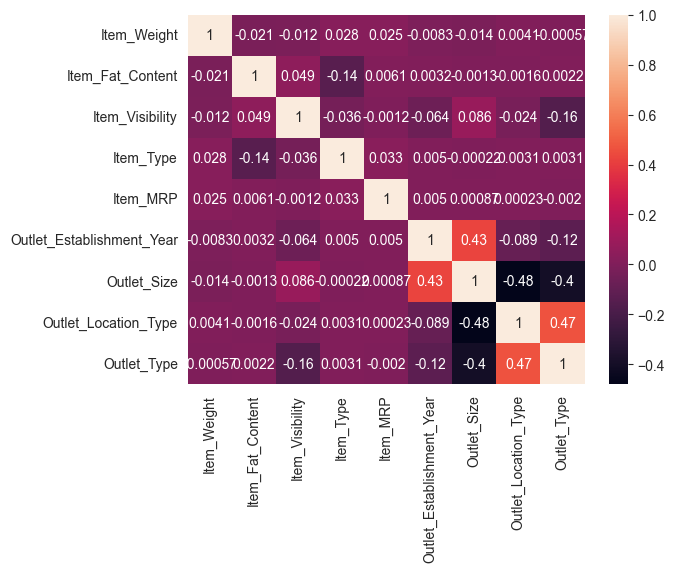